# Logs

- The model performed better with Gradient boosting till 0005hrs 01/08/19
- GBR gave a score of 99.96431 using only 2 preprocessed columns (ie) hour and days
- GBR gave a score of 99.96412 using only all preprocessed columns
- Random forest gave a score of 99.96443 using only 2 preprocessed columns (ie) hour and days
- Random forest didnt give a good score when all the features were considered
- GBR gave a score of 99.96748 over Random Forest which gave a score of 99.96703 when 3 columns were used (ie) hour, days, months
- GBR gives a score of 99.96744 on using encoded temperature as a feature column

# Preprocessing

In [1]:
#Manipulation
import pandas as pd
import numpy as np 

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#Data modelling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge

#Split of train and test within train. PURPOSE:Train
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

#Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

train_path = '.Train.csv'
test_path = 'Test.csv'

In [2]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
#test_df.shape
14454-len(test_df['date_time'].unique())
dup = test_df[test_df.duplicated(['date_time'],keep=False)]
test_df['date_time'] = pd.to_datetime(test_df.date_time)
test_df.insert(3,"months",test_df['date_time'].dt.month)
train_df['date_time'] = pd.to_datetime(train_df.date_time)
train_df.insert(3,"months",train_df['date_time'].dt.month)
#train_df=train_df[train_df['rain_p_h']<10]
len(dup['date_time'].unique())
#print(train_df.shape)

1807

In [3]:
train_df[(train_df['date_time'].dt.day==18) & (train_df['date_time'].dt.month==5) & (train_df['date_time'].dt.hour==0)]
#train_df['date_time'].dt.time

,date_time,is_holiday,air_pollution_index,months,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
6099,2013-05-18,None,280,5,95,1,192,4,4,293.38,0.0,0.0,90,Clouds,overcast clouds,1173
14408,2014-05-18,None,282,5,30,1,90,7,7,285.11,0.0,0.0,32,Clouds,scattered clouds,1324
23430,2016-05-18,None,248,5,92,3,299,9,9,280.01,0.0,0.0,1,Clear,sky is clear,588


AttributeError: module 'seaborn' has no attribute 'scatterplot'

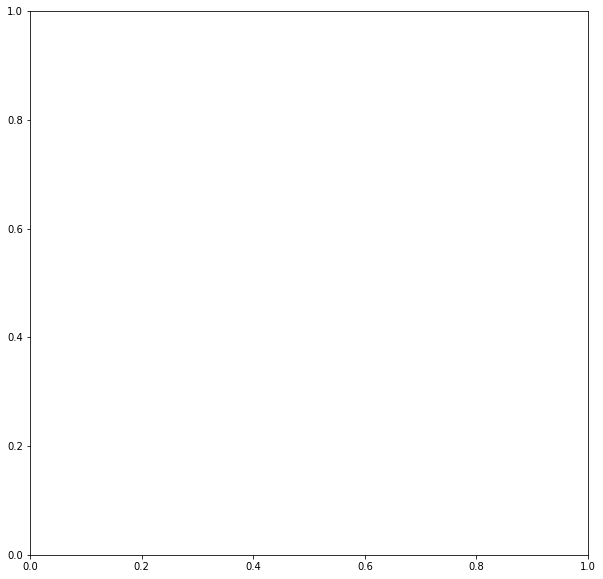

In [4]:
plt.subplots(figsize=(10,10))
sns.scatterplot(test_df['months'],test_df['air_pollution_index'])
plt.subplots(figsize=(10,10))
sns.scatterplot(train_df['months'],train_df['air_pollution_index'],hue=train_df['traffic_volume'])
plt.show()

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
#isDrive = True
#train_path = '/content/drive/My Drive/Train.csv'
#test_path = '/content/drive/My Drive/Test.csv'

In [0]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

#Delete unnecessary columns
train_df.drop(['snow_p_h','visibility_in_miles','wind_direction'],inplace = True,axis = 1)

test_df.drop(['snow_p_h','visibility_in_miles','wind_direction'],inplace = True,axis = 1)

train_df=train_df[train_df['rain_p_h']<10]

# Removing is holiday feature after filtering it out
#train_df=train_df[train_df['is_holiday']=='None']
#train_df.drop(['is_holiday'],axis=1,inplace=True)

#test_df.drop(['is_holiday'],axis=1,inplace=True)

# Encoding the is_holiday feature column
c=0
for i in train_df['is_holiday'].unique():  
  train_df['is_holiday'] =np.where(train_df['is_holiday']==i,c , train_df['is_holiday'])
  test_df['is_holiday'] =np.where(test_df['is_holiday']==i,c , test_df['is_holiday'])
  c+=1
train_df['is_holiday']=train_df['is_holiday'].astype(int)
test_df['is_holiday']=test_df['is_holiday'].astype(int)

# Converting the Float values of temperature to int
train_df['temperature']=np.round(train_df['temperature']).astype(int)
train_df=train_df[train_df['temperature']>0]

test_df['temperature']=np.round(test_df['temperature']).astype(int)


#Obtain hour as separate column and day as separate column

train_df['date_time'] = pd.to_datetime(train_df.date_time)
train_df.insert(1,"hour",train_df['date_time'].dt.hour)
train_df.insert(2,"days",train_df['date_time'].dt.weekday)
train_df.insert(3,"months",train_df['date_time'].dt.month)
train_df.drop(['date_time'],axis=1,inplace=True)

test_df['date_time'] = pd.to_datetime(test_df.date_time)
test_df.insert(1,"hour",test_df['date_time'].dt.hour)
test_df.insert(2,"days",test_df['date_time'].dt.weekday)
test_df.insert(3,"months",test_df['date_time'].dt.month)
test_df.drop(['date_time'],axis=1,inplace=True)

# Weather to Lower Case
#train_df['weather_type'] = train_df['weather_type'].str.lower()

#test_df['weather_type'] = test_df['weather_type'].str.lower()

#Filter the wind speed to rectify the abnormality found in describe()
train_df = train_df[train_df['wind_speed']<=9]

#Filter the temperature to rectify the abnormality found in describe()
train_df = train_df[train_df['temperature']>=200]

#Group Temperature and label it
#bins = [240, 250, 260, 270, 280, 290, 300, 311]
#labels = [1,2,3,4,5,6,7]
#train_df['temperature'] = pd.cut(train_df['temperature'], bins=bins, labels=labels)
#test_df['temperature'] = pd.cut(test_df['temperature'], bins=bins, labels=labels)
#rain_df=train_df.astype({'temperature': 'int64'})
#test_df=test_df.astype({'temperature': 'int64'})

#Encoding the weather_description feature column
c=0
for i in train_df['weather_description'].unique():  
  train_df['weather_description'] =np.where(train_df['weather_description']==i,c , train_df['weather_description'])
  test_df['weather_description'] =np.where(test_df['weather_description']==i,c , test_df['weather_description'])
  c+=1
train_df['weather_description']=train_df['weather_description'].astype(int)
test_df['weather_description']=test_df['weather_description'].astype(int)


# Encoding the weather_type feature column
train_df['weather_type'] =np.where(train_df['weather_type']=='Clouds',0 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Clouds',0 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Clear',1 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Clear',1 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Rain',2 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Rain',2 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Drizzle',3 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Drizzle',3 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Mist',4 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Mist',4 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Haze',5 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Haze',5 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Fog',6 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Fog',6 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Thunderstorm',7 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Thunderstorm',7 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Snow',8 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Snow',8 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Squall',9 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Squall',9 ,test_df['weather_type'])
train_df['weather_type'] =np.where(train_df['weather_type']=='Smoke',10 , train_df['weather_type'])
test_df['weather_type'] =np.where(test_df['weather_type']=='Smoke',10 ,test_df['weather_type'])


In [9]:
train_df.head()

,hour,days,months,is_holiday,air_pollution_index,humidity,wind_speed,dew_point,temperature,rain_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,9,1,10,0,121,89,2,1,288,0.0,40,0,0,5545
1,10,1,10,0,178,67,3,1,289,0.0,75,0,1,4516
2,11,1,10,0,113,66,3,2,290,0.0,90,0,2,4767
3,12,1,10,0,20,66,3,5,290,0.0,90,0,2,5026
4,13,1,10,0,281,65,3,7,291,0.0,75,0,1,4918


In [10]:
test_df.head()

,hour,days,months,is_holiday,air_pollution_index,humidity,wind_speed,dew_point,temperature,rain_p_h,clouds_all,weather_type,weather_description
0,0,3,5,0,73,63,1,4,285,0.0,90,2,12
1,0,3,5,0,251,63,1,4,285,0.0,90,4,7
2,0,3,5,0,75,56,1,1,285,0.0,90,3,6
3,1,3,5,0,98,56,1,2,285,0.0,90,2,13
4,1,3,5,0,283,56,1,1,285,0.0,90,4,7


In [11]:
test_df.describe()

,hour,days,months,is_holiday,air_pollution_index,humidity,wind_speed,dew_point,temperature,rain_p_h,clouds_all,weather_description
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000
mean,11.383631,2.990383,6.735713,0.009132,154.679397,67.833887,3.607306,5.005535,283.862460,0.066965,46.801785,6.162931
std,6.915077,2.006522,3.027886,0.280947,83.405392,21.147425,2.212177,2.586276,12.775363,0.466853,39.232165,6.993307
min,0.000000,0.000000,1.000000,0.000000,10.000000,10.000000,0.000000,1.000000,246.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,5.000000,0.000000,83.000000,54.000000,2.000000,3.000000,274.000000,0.000000,1.000000,3.000000
50%,11.000000,3.000000,7.000000,0.000000,155.000000,71.000000,3.000000,5.000000,288.000000,0.000000,40.000000,3.000000
75%,17.000000,5.000000,9.000000,0.000000,227.000000,85.000000,5.000000,7.000000,294.000000,0.000000,90.000000,7.000000
max,23.000000,6.000000,12.000000,11.000000,299.000000,100.000000,16.000000,9.000000,310.000000,10.600000,92.000000,36.000000


In [12]:
test_df.describe()

,hour,days,months,is_holiday,air_pollution_index,humidity,wind_speed,dew_point,temperature,rain_p_h,clouds_all,weather_description
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000
mean,11.383631,2.990383,6.735713,0.009132,154.679397,67.833887,3.607306,5.005535,283.862460,0.066965,46.801785,6.162931
std,6.915077,2.006522,3.027886,0.280947,83.405392,21.147425,2.212177,2.586276,12.775363,0.466853,39.232165,6.993307
min,0.000000,0.000000,1.000000,0.000000,10.000000,10.000000,0.000000,1.000000,246.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,5.000000,0.000000,83.000000,54.000000,2.000000,3.000000,274.000000,0.000000,1.000000,3.000000
50%,11.000000,3.000000,7.000000,0.000000,155.000000,71.000000,3.000000,5.000000,288.000000,0.000000,40.000000,3.000000
75%,17.000000,5.000000,9.000000,0.000000,227.000000,85.000000,5.000000,7.000000,294.000000,0.000000,90.000000,7.000000
max,23.000000,6.000000,12.000000,11.000000,299.000000,100.000000,16.000000,9.000000,310.000000,10.600000,92.000000,36.000000


In [0]:
#plot = sns.catplot(x = "weather_type",y = "clouds_all",kind = "box",data = train_df)
#plot.set_xticklabels(rotation=90)

In [0]:
#def move_to_position(l, position, column):
#    i = l.pop(l.index(column))
#    l.insert(position, i)

In [0]:
#Label encoding

#ohe_train_df = train_df['weather_type'].astype(str).str.get_dummies(" ")
#ohe_train_df = pd.concat([train_df,ohe_train_df],axis = 1,sort = False)
#ohe_train_df.drop('weather_type',axis = 1,inplace = True)
#ohe_train_df['weekday_hour'] = [(pd.Timestamp(x).weekday() * 24) + pd.Timestamp(x).hour for x in ohe_train_df['date_time']]
#cols = list(ohe_train_df.columns)
#move_to_position(cols, 1, 'weekday_hour')
#move_to_position(cols, -1, 'traffic_volume')
#ohe_train_df = ohe_train_df[cols]
#ohe_train_df



In [0]:
#Modelling

#GBR
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=8,
    learning_rate=0.5
)
#regressor.fit(X, y)

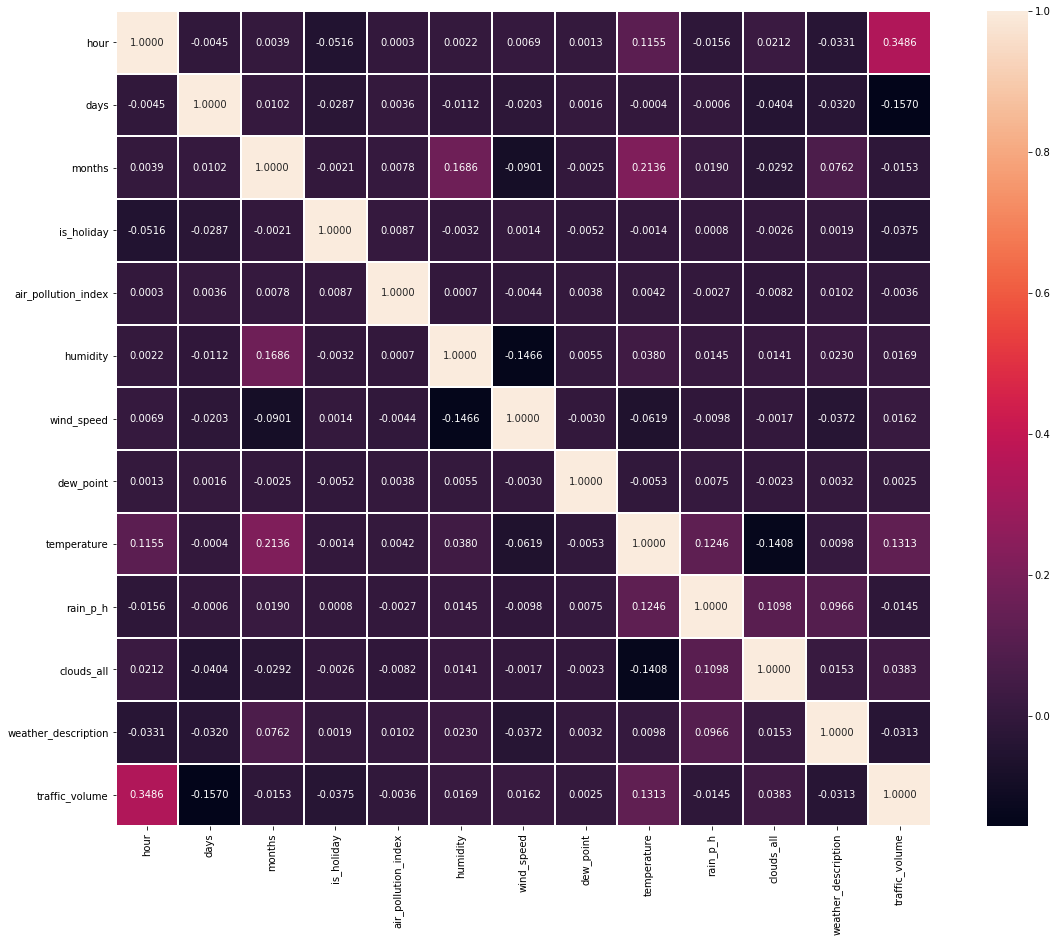

In [16]:
plt.subplots(figsize=(20,15))
sns.heatmap(train_df.corr(),
            cbar=True, annot=True, square=True, fmt='.4f', linewidths=1)

# Testing and Training!

In [0]:
#RUN WHILE TESTING AND VALIDATION
X = train_df.iloc[:,:-1]
#X = train_df[['hour','days','months','weather_description','rain_p_h']]
y = train_df['traffic_volume']

In [0]:
# TEST
X_test = test_df.iloc[:,:]
#X_test = test_df[['hour','days','weather_description','rain_p_h']]

In [0]:
#norm_df=normalize(X,axis=1)
#names=X.columns
#norm_df = pd.DataFrame(norm_df, columns=names)
#norm_df['tf']=y
#norm_df.corr()

names = X.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=names)
scaled_df = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_df, columns=names)

In [0]:
#TRAIN-TEST SPLIT 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 9,train_size = 0.7)

In [240]:
# TRAINING (GRADIENT BOOSTING)
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=8,
    learning_rate=0.5
)
regressor.fit(X, y)
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

best_regressor = GradientBoostingRegressor(
    max_depth=8,
    n_estimators=best_n_estimators,
    learning_rate=0.5
)
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.2923769822869677

In [272]:
# TESTING (GRADIENT BOOSTING)

best_regressor = GradientBoostingRegressor(
    max_depth=8,
    n_estimators=best_n_estimators,
    learning_rate=0.5
)
best_regressor.fit(X, y)
y_pred = best_regressor.predict(X_test)
y_pred

array([ 957.70312062,  957.70312062,  899.35688472, ..., 2264.0515114 ,
       1654.95155996, 1206.62779583])

In [257]:
y_pred.unique()

AttributeError: ignored

In [0]:
#TRAINING (RANDOM FOREST)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
n_estimators=200
model = ExtraTreesRegressor(random_state=0, n_estimators=n_estimators)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#y_pred = np.round(y_pred).astype(int)

print("Results: %.5f RMSLE" % (np.sqrt(mean_squared_log_error(y_test, y_pred))))

#print(pd.DataFrame(y_pred,y_test))


Results: 0.33243 RMSLE


In [0]:
#Feature Importances Random Forest
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: hour                 Importance: 0.83
Variable: days                 Importance: 0.11
Variable: temperature          Importance: 0.02
Variable: months               Importance: 0.01
Variable: air_pollution_index  Importance: 0.01
Variable: humidity             Importance: 0.01
Variable: wind_speed           Importance: 0.01
Variable: dew_point            Importance: 0.01
Variable: clouds_all           Importance: 0.0
Variable: weather_type         Importance: 0.0


[None, None, None, None, None, None, None, None, None, None]

In [0]:
#TESTING (RANDOM FOREST)
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(X, y)
y_pred = model.predict(X_test)
#y_pred = np.round(y_pred).astype(int)
y_pred

array([ 654.31 ,  714.935,  669.57 , ..., 2348.965, 1917.1  , 1099.91 ])

In [284]:
# DNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
model = Sequential()
X_train = np.reshape(X, (X.shape[0], 1, X.shape[1]))

#get number of columns in training data
n_cols = X_train.shape[1]
print(n_cols)
#add model layers
#model.add(Dense(12, activation='relu', input_shape=(n_cols,)))
#model.add(Dense(24, activation='tanh'))
#model.add(Dense(7, activation='relu'))
#model.add(Dense(1))

model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['msle'])

from keras.callbacks import EarlyStopping#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)#train model
model.fit(X, y, validation_split=0.2, epochs=50, callbacks=[early_stopping_monitor])



ValueError: ignored

In [247]:
y_pred = model.predict(X)
#y_pred=np.concatenate( y_pred, axis=0 )
np.sqrt(mean_squared_log_error( y, y_pred))

0.46487455065825223

In [0]:
#Comparision of regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_log_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.sqrt(np.abs(cv_results)).mean(), np.sqrt(np.abs(cv_results)).std())
    print(msg)

In [0]:
#Grid Search
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([57]))
model = GradientBoostingRegressor(random_state=21,learning_rate=0.05,max_depth=2)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_log_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.278477 (0.012574) with: {'n_estimators': 57}
Best: -0.278477 using {'n_estimators': 57}


# EXPORTING

In [0]:
#EXPORTING
y_pred = abs(y_pred)
dft = pd.read_csv(test_path)
final = {'date_time':dft['date_time'],'traffic_volume':np.round(y_pred).astype(int)}
final = pd.DataFrame(final)
final.to_csv('Submission.csv',index = False)

In [273]:
y_pred[y_pred<0]

array([], dtype=float64)